Import Necessary Packages

In [1]:
import cluster_freq
import generate_clusters
import generate_plotly
import get_matches
import json
import matplotlib.pyplot as plt
import networkx as nx
import network_graph
import numpy as np
import pandas as pd
import plotly 
import plotly.plotly as py
from plotly.graph_objs import *
import pylab
import set_plotly_credentials as setply
from sklearn.cluster import KMeans

Read in Dataset

In [2]:
filepath = 'https://raw.githubusercontent.com/rmw647/not-that-into-you/master/Speed%20Dating%20Data.csv'
data = pd.read_csv(filepath, encoding='latin1')

Downselect columns to ones needed for analysis and create a smaller dataframe with only those columns.

In [3]:
keep_columns = ['iid','pid','match','age','sports','tvsports','exercise','dining','museums',
                'art','hiking','gaming','clubbing','reading','tv','theater','movies','concerts',
                'music','shopping','yoga','exphappy']
bio_info = data[keep_columns]
bio_info = bio_info.dropna(how='any')

Original dataframe has 10 records for each participant (one record for each date they went on). Create a subsetted dataframe that contains only one row for participant.

In [4]:
bio_info_subset = bio_info.drop_duplicates(subset='iid')

Select out the data for particpants who matched. Create a dataframe of patching pairs and a list of edges with data (person1,  person2).

In [5]:
matches, edges = get_matches.get_matches(bio_info)

Perform K-means clustering. No need to normalize because all data used is on the same scale (1- 10). We ran for several different numbers of clusters, and found 3 was a manageable number that still offered granularity.

Add a column to the subsetted data that shows the cluster assignment for each participant.

In [6]:
cluster_columns = ['sports','tvsports','exercise','dining','museums','art','hiking','gaming','clubbing',
                   'reading','tv','theater','movies','concerts','music','shopping','yoga','exphappy']
number_of_clusters = 4
bio_info_subset = generate_clusters.generate_clusters(bio_info_subset, cluster_columns, 
                                                      number_of_clusters,'cluster_assignment')

/Users/laurenwilliams/Documents/capstone/not-that-into-you/generate_clusters.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Create and plot a network graph showing the interactions within and between clusters of people.

In [18]:
G, clusters = network_graph.network_graph(bio_info_subset, edges, "matches", number_of_clusters)

In [19]:
setply.set_plotly_credentials('credentials.json')

In [20]:
awesome_plot = generate_plotly.generate_plotly(G, clusters)

In [21]:
awesome_plot

Do people within the same cluster match with each other more frequently than they match with people in other clusters? Make a plot showing how often people match within cluster and outside cluster.

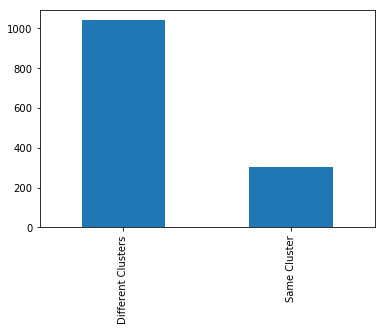

In [12]:
cluster_freq.cluster_freq(clusters,matches)

In [13]:
cluster_sizes = cluster_freq.get_cluster_size(bio_info_subset)
cluster_sizes

{'cluster0': 125, 'cluster1': 119, 'cluster2': 141, 'cluster3': 157}

In [14]:
profiles = bio_info_subset.groupby(['cluster_assignment']).mean()
profiles.drop(['pid','iid'], inplace=True,axis=1)

In [15]:
profiles

,match,age,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy
cluster_assignment,,,,,,,,,,,,,,,,,,,,
0,0.144000,27.840000,6.224000,2.360000,6.280000,7.320000,7.440000,7.208000,6.472000,2.560000,4.672000,8.152000,2.920000,6.568000,7.432000,6.728000,7.640000,3.608000,4.536000,5.448000
1,0.151261,25.966387,3.260504,2.647059,4.621849,8.319328,7.420168,7.252101,4.579832,3.361345,6.168067,7.831933,6.386555,7.966387,8.647059,7.243697,8.142857,7.151261,4.630252,4.655462
2,0.148936,25.815603,7.673759,6.276596,7.361702,8.652482,8.212766,8.028369,6.929078,4.815603,6.319149,7.978723,6.695035,8.063830,8.659574,8.092199,8.588652,7.156028,6.085106,6.049645
3,0.152866,25.968153,7.789809,6.210191,6.617834,6.929936,5.152866,4.636943,4.993631,4.382166,5.764331,6.789809,5.210191,4.828025,7.019108,5.515924,7.216561,4.643312,2.643312,5.726115


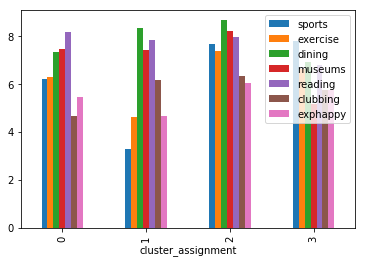

In [16]:
%matplotlib inline
profiles_subset=profiles[['sports','exercise','dining','museums','reading','clubbing','exphappy']]
profiles_subset.plot(kind = 'bar')